In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'
!kaggle datasets download -d dansbecker/food-101


100% 9.37G/9.38G [01:46<00:00, 89.2MB/s]
100% 9.38G/9.38G [01:46<00:00, 94.6MB/s]


In [4]:
import zipfile
import os

# Define the path to the zip file
zip_file_path = '/content/food-101.zip'

# Define the directory where you want to extract the contents
extracted_dir = '/content/food-101'

# Create the target directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List files in the extracted directory
extracted_files = os.listdir(extracted_dir)
extracted_files


['food-101', 'food-101.zip']

In [5]:
# #preprocessing
# #1.resize
# #2.flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
# flatData = []
dataDirectory = '/content/food-101/food-101/food-101/images'
categoriesOrLabel = ['pizza', 'falafel', 'ice_cream']

for category in categoriesOrLabel:
    classNum = categoriesOrLabel.index(category)
    # this will append the dataDirectory path on category
    # for example path /content/food-101/food-101/food-101/images/pizza
    path = os.path.join(dataDirectory, category)
    for img in os.listdir(path):
        imgArray = imread(os.path.join(path, img))  # for reading an image
        imgResized = resize(imgArray, (64, 64, 3))
        # flatData.append(imgResized.flatten())
        images.append(imgResized)
        target.append(classNum)



/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


[[[0.37650979 0.18457535 0.02622876]
  [0.45878251 0.2749769  0.08930863]
  [0.48206662 0.29140612 0.09070414]
  ...
  [0.81783675 0.58764459 0.18607647]
  [0.79988649 0.59854112 0.23679088]
  [0.7420287  0.54107408 0.19151334]]

 [[0.36377961 0.17123091 0.01309016]
  [0.44648928 0.26108719 0.07321911]
  [0.47192217 0.27304073 0.06548104]
  ...
  [0.81136612 0.54750057 0.14210366]
  [0.8240421  0.59075694 0.20387667]
  [0.77059954 0.54239959 0.14909981]]

 [[0.37389363 0.17770907 0.00855811]
  [0.45836539 0.25497785 0.04433247]
  [0.45282628 0.2352475  0.03220315]
  ...
  [0.71464205 0.41237965 0.06262791]
  [0.76318017 0.44541049 0.04741382]
  [0.78184158 0.45979935 0.04557722]]

 ...

 [[0.71409761 0.24292738 0.02651559]
  [0.69784182 0.23223262 0.03285998]
  [0.75631188 0.38478137 0.07331308]
  ...
  [0.8648754  0.49069614 0.1008372 ]
  [0.87346007 0.5848204  0.23002033]
  [0.88548968 0.62744359 0.23556342]]

 [[0.74016999 0.34631456 0.04258123]
  [0.78018257 0.39295906 0.06892697]


In [20]:
#apply extract featrues then  apply logistic regression
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import color, feature, exposure
from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import confusion_matrix, classification_report

def extract_hog_features(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features

# list contains feature for every image
features_list=[]


for i in  images :


    # Extract HOG features and visualize
    hog_features = extract_hog_features(i)

    # Append HOG features to the features list
    features_list.append(hog_features)



# Convert lists to NumPy arrays because dealing with array is better
features_array = np.array(features_list)
# labels for each image in feature array or list
labels_array=np.array(target)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_array, labels_array, test_size=0.3, random_state=109)

# Standardize the data
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)



# PCA is used to reduce the dimentionalty of feature exctraction to draw roc


# Define the parameter grid for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l2', 'none']}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Initialize the GridSearchCV
clf = GridSearchCV(log_reg, param_grid, n_jobs=-1)
# Fit the model on the training data
clf.fit(x_train, y_train)

# Save the best estimator to a variable tranied on 2916 feature
model = clf.best_estimator_

# clf.fit(x_train_pca,y_train_pca)
# modelPca=clf.best_estimator_

# Make predictions on the testing data
predictions = model.predict(x_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


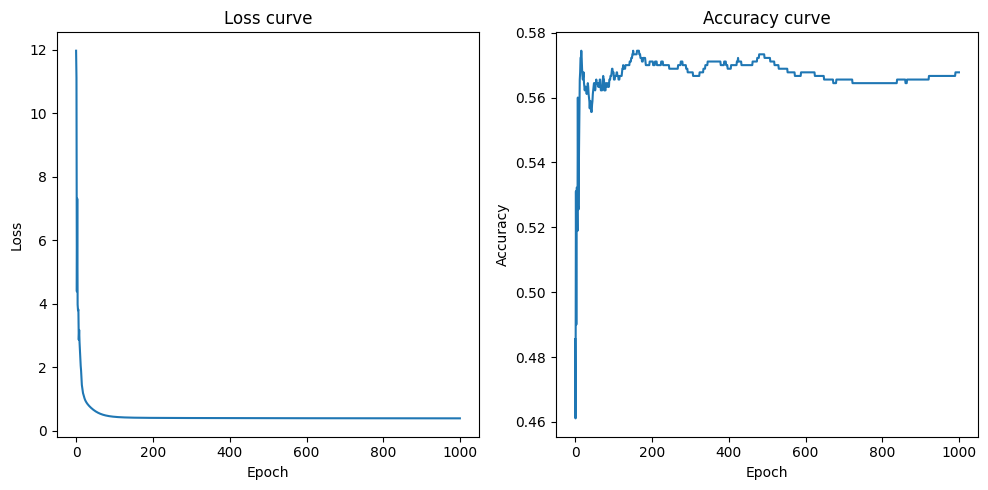

In [13]:
# loss curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Initialize the SGDClassifier with log loss
sgd_clf = SGDClassifier(loss='log', max_iter=1, warm_start=True, random_state=42)

# Lists to store the loss and accuracy for each epoch
losses = []
accuracies = []

# Number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Train the model for one epoch
    sgd_clf.partial_fit(x_train, y_train, classes=np.unique(y_train))

    # Calculate the loss on the training set
    probabilities = sgd_clf.predict_proba(x_train)
    loss = log_loss(y_train, probabilities)
    losses.append(loss)

    # Calculate the accuracy on the testing set
    predictions = sgd_clf.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot the accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


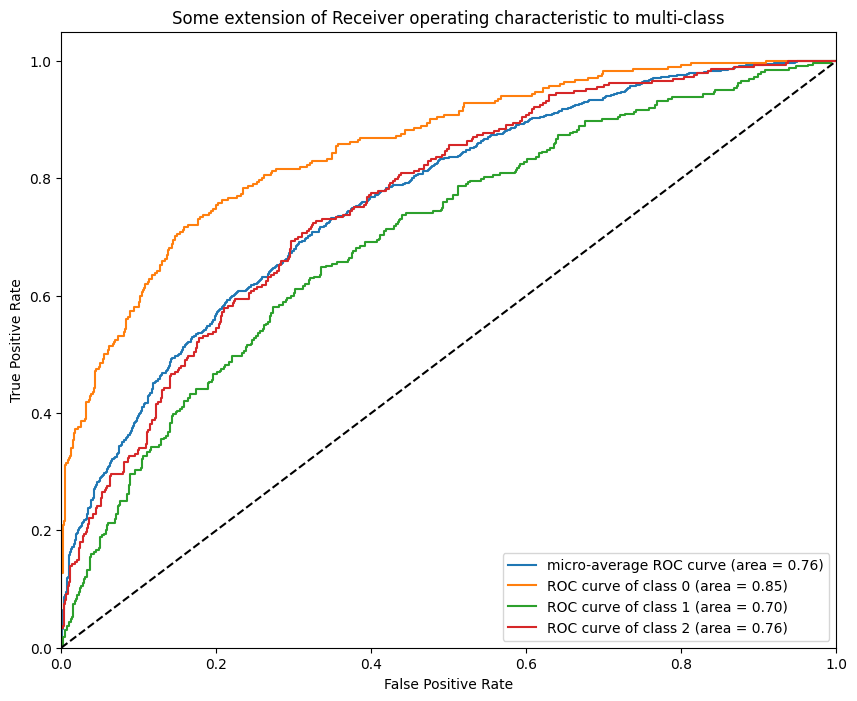

In [19]:
# roc curve

from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt

# Assuming you have your test targets in y_test and your predicted probabilities in y_pred_proba
# And your classes are [0, 1, 2, 3, 4]

# Binarize the output
# Get the unique classes in y_test
classes = np.unique(y_test)
y_pred_proba = model.predict_log_proba(x_test)

# Binarize the output
y_ = label_binarize(y_test, classes=classes)
n_classes = y_.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:",classification_rep)
print(conf_matrix)

Accuracy: 0.5833333333333334
Classification Report:               precision    recall  f1-score   support

           0       0.58      0.80      0.67       282
           1       0.61      0.39      0.48       324
           2       0.57      0.59      0.58       294

    accuracy                           0.58       900
   macro avg       0.59      0.59      0.58       900
weighted avg       0.59      0.58      0.57       900

[[226  23  33]
 [100 127  97]
 [ 63  59 172]]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
import pickle
pickle.dump(model,open('img_model.p','wb'))

In [53]:
model=pickle.load(open('img_model.p','rb'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score:  0.3389317375464623


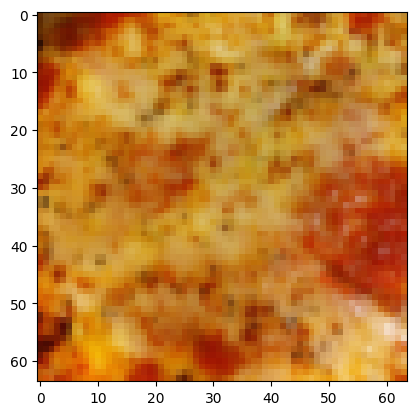

In [15]:
# Apply KMeans clustering

import matplotlib as mlp
import matplotlib.pyplot as plt
from  sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import color, feature, exposure
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

plt.imshow(images[0])
images[0].shape
def angular_distance(v1, v2):
    # Normalize the vectors
    v1_normalized = v1 / np.linalg.norm(v1)
    v2_normalized = v2 / np.linalg.norm(v2)
    # Calculate the angle between the vectors
    angle = np.arccos(np.clip(np.dot(v1_normalized, v2_normalized), -1.0, 1.0))
    return angle

def extract_hog_features(image):
    # Convert the image to grayscale
    gray_image = color.rgb2gray(image)

    # Calculate HOG features
    hog_features, hog_image = feature.hog(gray_image, visualize=True)

    # Enhance the contrast of the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

# list contains feature for every image
features_list=[]


for i in  images :
  # to  convert it to 3d
    # image = flatData[i].reshape(64, 64, 3)

    # Extract HOG features and visualize
    hog_features, hog_image = extract_hog_features(i)

    # Append HOG features to the features list
    features_list.append(hog_features)



    # Convert list of HOG features to a numpy array
hog_features = np.array(features_list)



# Apply PCA to your data
pca = PCA(n_components=2)  # You can adjust the number of components
hog_features_pca = pca.fit_transform(hog_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming you have three classes
kmeans.fit(hog_features_pca)
labels = kmeans.labels_

# Calculate Silhouette Score
score = silhouette_score(hog_features_pca, labels, metric='euclidean')

# Print the score
print('Silhouette Score: ', score)
